# Multi-layer neural networks, part 1

So far, we've been investigating very simple neural networks that comprise a single neuron.  Today, we'll take our first steps towards deep learning by exploring neural nets with more than one neuron arranged in multiple _layers_.

## 1. Fitting a reference, single-neuron network.

<div>
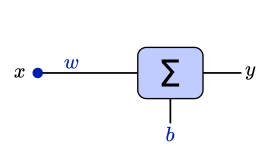
</div>

We'll begin at what should by now be a familiar starting point: a network with a single neuron that takes a single input.  We'll again fit this model to our fuel efficiency data, modeling the following relationship.

$$ \hat{mpg} = w \cdot hp + b $$

We'll use this model as a reference as we work toward more complicated neural net architectures.

In [ ]:
import numpy as np
import pandas as pd

import plotnine as pn

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import torch
from torch import nn
from skorch import NeuralNetRegressor

In [ ]:
df = pd.read_csv('data/auto_mpg.csv')
#df = pd.read_csv('/blue/zoo4926/share/Jupyter_Content/data/auto_mpg.csv')
df = df.sample(frac=1)


In [ ]:
df

In [ ]:
class SimpleRegressNet(nn.Module):
    """
    Defines a simple neural net with a single neuron that takes a single input.
    """
    def __init__(self):
        super().__init__()
        
        self.neuron = nn.Linear(1, 1)
    
    def forward(self, X):
        y = self.neuron(X)
        
        return y

In [ ]:
x = df[['hp']].to_numpy(np.float32)
y = df[['mpg']].to_numpy(np.float32)

# Good hyperparameter values:
#  batch_size = N; lr = 0.1, epochs = 40
#  batch_size = 32; lr = 0.004, epochs = 200

nn_model = NeuralNetRegressor(
    SimpleRegressNet,
    train_split=None,
    batch_size=len(df),
    criterion=nn.MSELoss,
    optimizer=torch.optim.SGD,
    max_epochs=40,
    lr=0.1
)

pl = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', nn_model)
])

pl.fit(x, y)

**Exercise:** What is the $MSE$ of your simple neural net model?  What is the value of $R^2$ for your model?

## 2. Adding more neurons

We would like our neural net to be able to do more than simple linear regression.  Let's try adding two more neurons to our network, arranged in two _layers_.

Now, let's fit our new neural net to the fuel efficiency data.

**Exercise:** What is the $MSE$ of your multi-layer model?  What is the value of $R^2$ for your model?

## 3. Adding transfer functions

If we want our neural net to do more, we need to add some more mathematical machinery to our concept of an artificial neuron.  Specifically, we will add _transfer functions_ (often also called _activation functions_, which requires more typing) to modify the outputs of some of the neurons in our network.

Let's start by adding the $ReLU()$ transfer function to our network.  We'll also introduce adding _momentum_ to gradient descent.

**Exercise:** Fit your new neural net to the fuel efficiency data.  What is your final $MSE$?  What is the value of $R^2$ for the model?

You might also find it helpful to visualize the loss during training.

In [ ]:
tr_df = pd.DataFrame(nn_model.history)

pn.ggplot(tr_df, pn.aes(x='epoch', y='train_loss')) + pn.geom_line()# + pn.ylim(15,25)

**Exercise:** Let's see what sort of model we ended up with!  Because our neural net has only a single input variable, we can directly graph the model.  We'll work together to write code that generates paired $(x, y)$ values we can use to graph our model.  Once we have that, try visualizing your model.

**Exercise:** We've so far tried using $relu()$ as the transfer function for our network.  What do you predict will happen if we use a different transfer function, such as $tanh()$?  Modify your code to test your prediction!  (Hint: Pytorch functions that might be useful here include `nn.Tanh()` and `nn.Sigmoid()`.)

## 4. Choosing hyperparameter values

We've previously discussed various strategies for choosing hyperparameters of a model-fitting procedure.  Let's see how we can apply these ideas to a neural network.

First, we define the hyperparameter values we want to test.

Then, we can use scikit-learn's `GridSearchCV` to find the best hyperparameter combinations.

Please note that this procedure for choosing a learning rate works here because we have a model that we can train quickly.  That will often not be the case.  Furthermore, we know that the learning rate affects how many epochs are required for convergence, but we're not accounting for that in any way.  In practice, you will likely need to use more sophisticated methods to find a good learning rate; the goal here was to take a step in the right direction using tools with which we are already familiar.